In [1]:
import torch

In [86]:
emb = torch.load("logs/Seq2Seq/version_101/emb.pt")

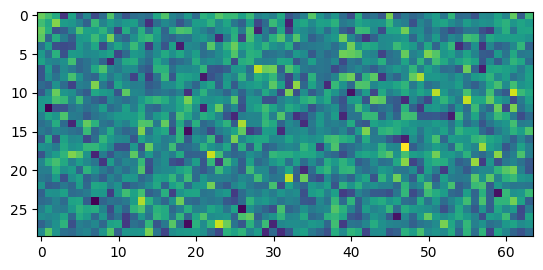

In [87]:
import matplotlib.pyplot as plt
embeddings = emb.to('cpu') 
plt.imshow(embeddings)

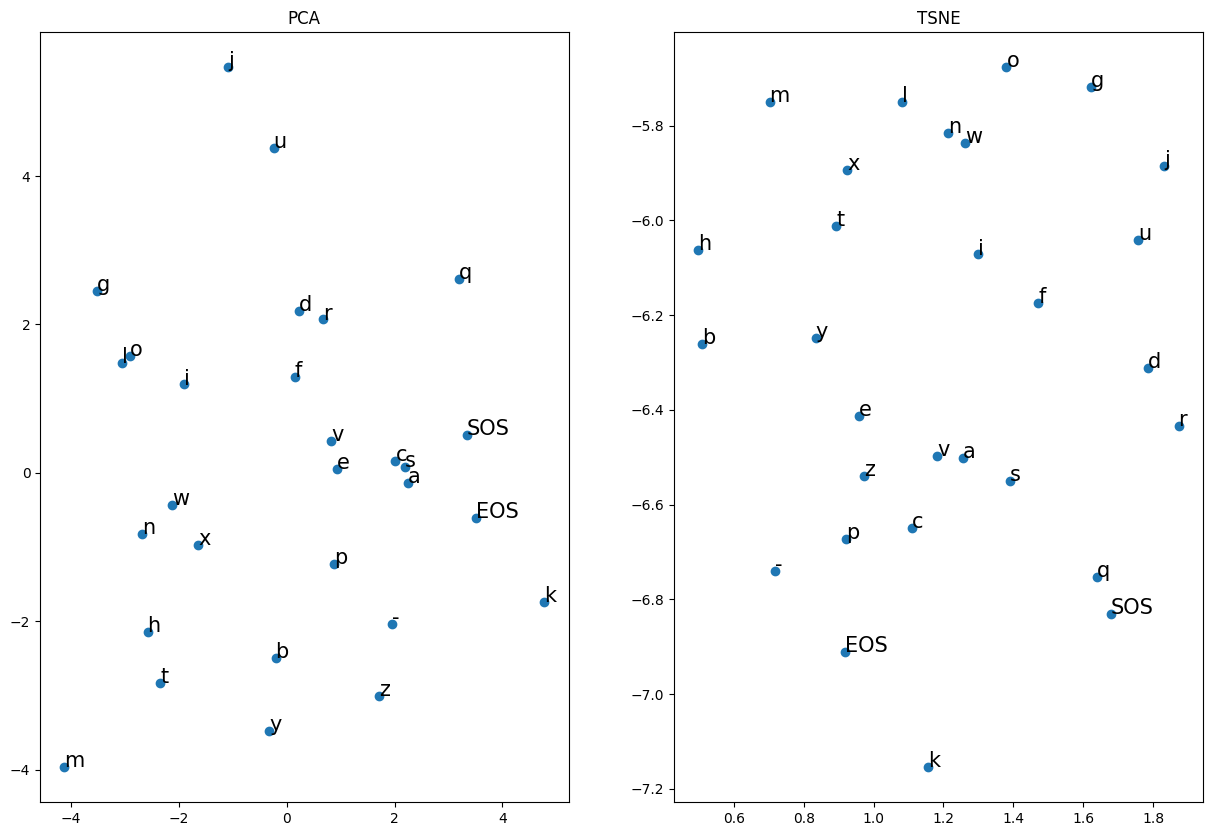

In [88]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# Instantialte tsne, specify cosine metric
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
vocab = {0: '-', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: 'SOS', 28: 'EOS'}
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X  = embeddings
y = [vocab[i] for i in range(29)]
Xt = pipe.fit_transform(X)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)

plot = ax.scatter(Xt[:,0], Xt[:,1])
c=0
for xy in zip(Xt[:,0], Xt[:,1]):                                       # <--
    ax.annotate(y[c] , xy=xy, textcoords='data',fontsize=15) # <--
    c+=1
ax.title.set_text('PCA') 


ax = fig.add_subplot(122)
tsne = TSNE(random_state = 42, n_iter = 1000,perplexity=25)
embeddings2d = tsne.fit_transform(embeddings)
ax.scatter(embeddings2d[:,0],embeddings2d[:,1])
c=0
for xy in zip(embeddings2d[:,0], embeddings2d[:,1]):                                       # <--
    ax.annotate(y[c] , xy=xy, textcoords='data',fontsize=15) # <--
    c+=1
ax.title.set_text('TSNE')


In [89]:


ax.scatter(pca.components_[0],pca.components_[1])
c=0
for xy in zip(pca.components_[0], pca.components_[1]):                                       # <--
    ax.annotate(c , xy=xy, textcoords='data') # <--
    c+=1


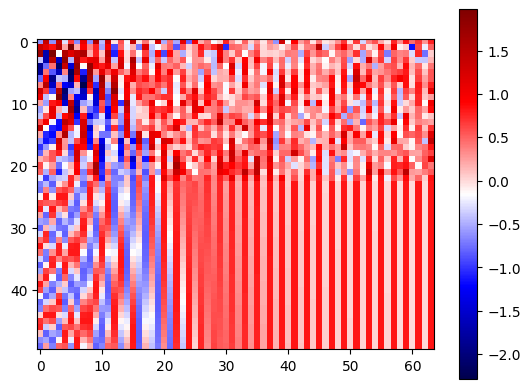

In [61]:
def create_positional_encodings(hidden_size, max_seq_len=1000):
    """Creates positional encodings for the inputs.

    Arguments:
        max_seq_len: a number larger than the maximum string length we expect to encounter during training

    Returns:
        pos_encodings: (max_seq_len, hidden_dim) Positional encodings for a sequence with length max_seq_len.
    """
    pos_indices = torch.arange(max_seq_len)[..., None]
    dim_indices = torch.arange(hidden_size//2)[None, ...]
    exponents = (2*dim_indices).float()/(hidden_size)
    trig_args = pos_indices / (10000**exponents)
    sin_terms = torch.sin(trig_args)
    cos_terms = torch.cos(trig_args)

    pos_encodings = torch.zeros((max_seq_len, hidden_size))
    pos_encodings[:, 0::2] = sin_terms
    pos_encodings[:, 1::2] = cos_terms
    #requires grad is false
    return pos_encodings

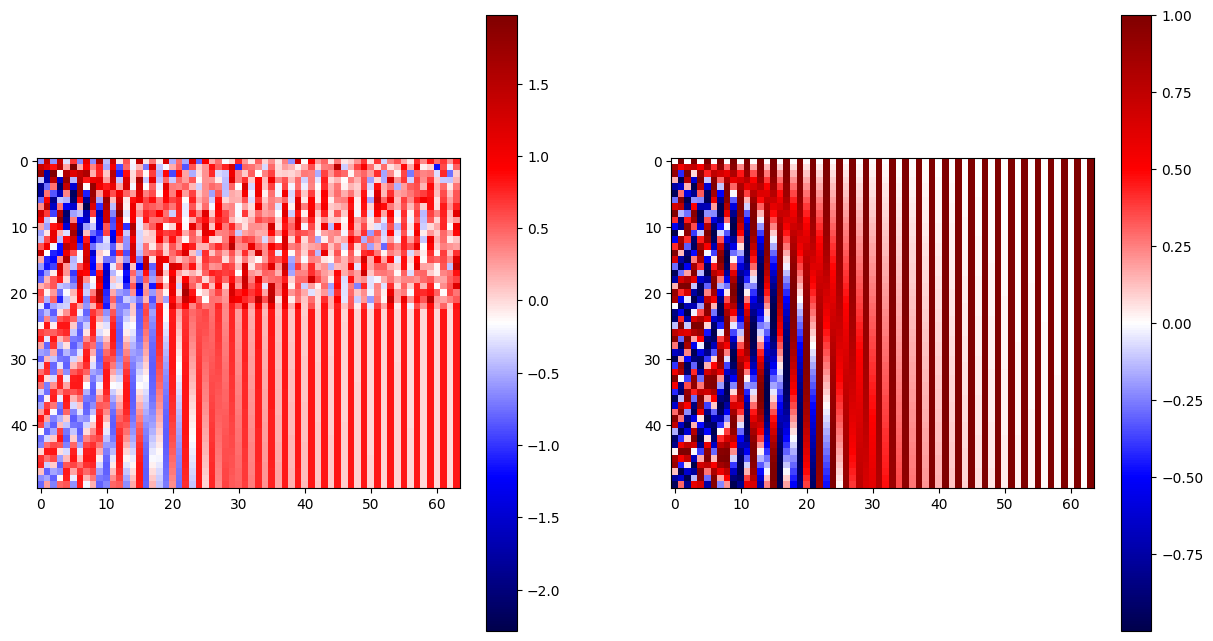

In [83]:
pos_emb = torch.load("logs/Seq2Seq/version_92/pos_emb.pt")
pos_emb = pos_emb.to('cpu') 

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

im = ax.imshow(pos_emb[:50],cmap = 'seismic')
fig.colorbar(im)
ax = fig.add_subplot(122)
im = ax.imshow(create_positional_encodings(64,50),cmap = 'seismic')
fig.colorbar(im)

In [63]:
import numpy as np
import glob

numpy_vars = []
for np_name in glob.glob("run_time/*.np[yz]"):
    numpy_vars.append(np.load(np_name))
    print(np_name)
timing = np.array(numpy_vars)

run_time/timing_2.npy
run_time/timing_1.npy


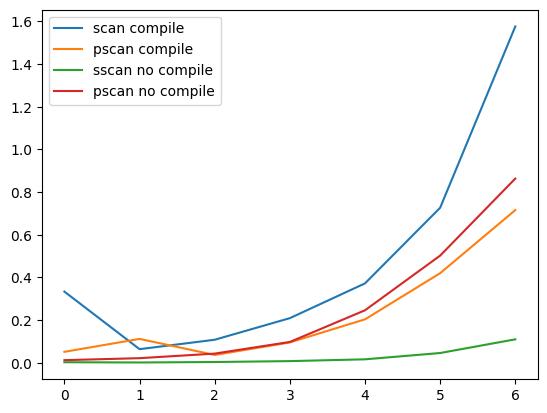

In [65]:
import matplotlib.pyplot as plt

plt.plot(timing[1,0,:8,0],label= 'scan compile')
plt.plot(timing[1,0,:8,1],label= 'pscan compile')
plt.plot(timing[0,0,:8,0],label= 'sscan no compile')
plt.plot(timing[0,0,:8,1],label= 'pscan no compile')

plt.legend()
plt.show()


In [29]:
timing[0:,0,:,0]

array([[ 5.45857201,  0.89288693,  1.61222753,  2.84879665,  5.49990894,
        10.91116815, 22.10600159, 45.31372501,  0.93136014,  1.10739353,
         1.02558051]])

In [5]:
import torch
from seq2seq import Seq2Seq
import matplotlib.pyplot as plt

In [48]:
"conditioningSEonditioningcay"[28]

'y'

Text(0, 0.5, 'acgninoitidnoESgninoitidnoc')

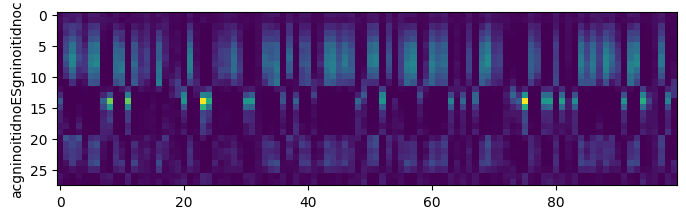

Text(0, 0.5, 'acgninoitidnoESgninoitidnoc')

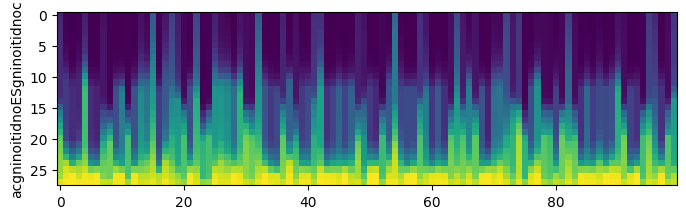

In [62]:
dt = torch.load("/research/hal-gaudisac/Deep_learning/homework-2-sachit3022/code/20_torch.Size([1, 28, 128])")
plt.rcParams['figure.figsize'] = [8, 4]

plt.imshow(torch.cumsum(-dt[0,:,:100].flip(dims=(0,)),dim=0).flip(dims=(0,)).exp().detach().cpu())
plt.ylabel("conditioningSEonditioningca"[::-1])

Text(0, 0.5, 'acgninoitidnoESgninoitidnoc')

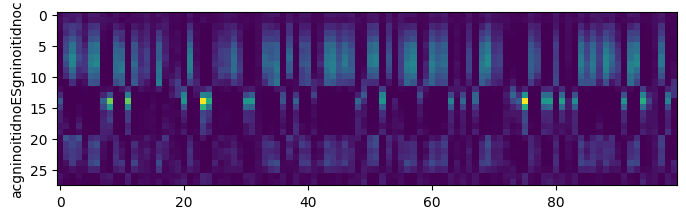

In [65]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.imshow(dt[0,:,:100].detach().cpu())
plt.ylabel("conditioningSEonditioningca"[::-1])

Text(0, 0.5, 'argsdnuo-yalperusaeSEsdnuorg-erusaelp')

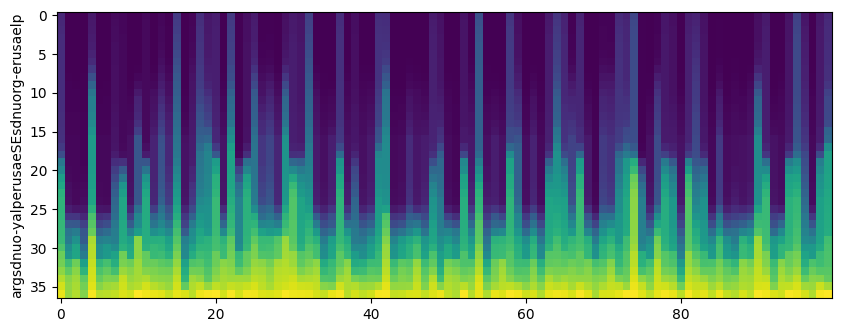

In [71]:
dt = torch.load("/research/hal-gaudisac/Deep_learning/homework-2-sachit3022/code/40_torch.Size([1, 37, 128])")
plt.rcParams['figure.figsize'] = [10, 4]
plt.imshow(torch.cumsum(-dt[0,:,:100].flip(dims=(0,)),dim=0).flip(dims=(0,)).exp().detach().cpu())
plt.ylabel("pleasure-groundsESeasureplay-oundsgra"[::-1])

Text(0, 0.5, 'argsdnuo-yalperusaeSEsdnuorg-erusaelp')

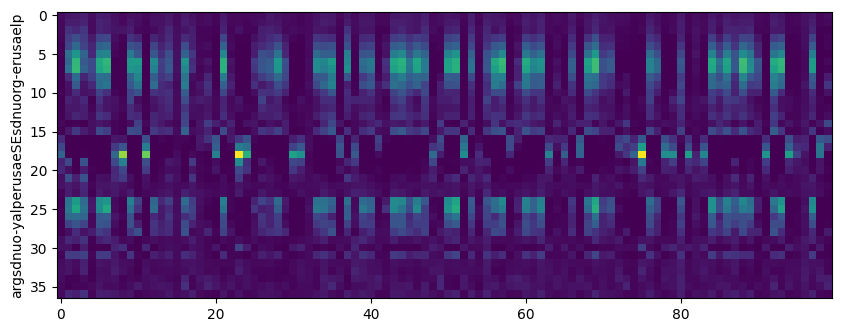

In [72]:
plt.imshow(dt[0,:,:100].detach().cpu())
plt.ylabel("pleasure-groundsESeasureplay-oundsgra"[::-1])

Text(0, 0.5, 'awsiSEsi')

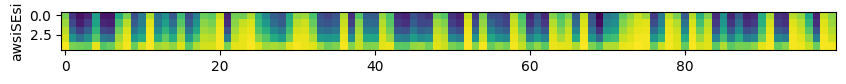

In [81]:
dt = torch.load("/research/hal-gaudisac/Deep_learning/homework-2-sachit3022/code/1_torch.Size([1, 5, 128])")
plt.rcParams['figure.figsize'] = [10, 30]
plt.imshow(torch.cumsum(-dt[0,:,:100].flip(dims=(0,)),dim=0).flip(dims=(0,)).exp().detach().cpu())
plt.ylabel("isESiswa"[::-1])

Text(0, 0.5, 'awsiSEsi')

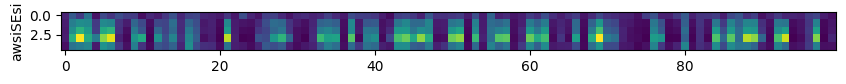

In [82]:
plt.imshow(dt[0,:,:100].detach().cpu())
plt.ylabel("isESiswa"[::-1])

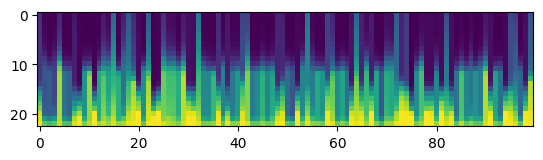

In [34]:
dt = torch.load("/research/hal-gaudisac/Deep_learning/homework-2-sachit3022/code/22_torch.Size([1, 23, 128])")
plt.imshow(torch.cumsum(-dt[0,:,:100].flip(dims=(0,)),dim=0).flip(dims=(0,)).exp().detach().cpu())

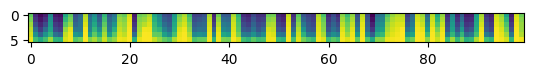

In [35]:
dt = torch.load("/research/hal-gaudisac/Deep_learning/homework-2-sachit3022/code/1_torch.Size([1, 6, 128])")
plt.imshow(torch.cumsum(-dt[0,:,:100].flip(dims=(0,)),dim=0).flip(dims=(0,)).exp().detach().cpu())